<a href="https://colab.research.google.com/github/calliopz/MachineLearning/blob/master/DataVisualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a base de dados

In [40]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd
import seaborn as sns

In [5]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Renomeando as colunas da base de dados

In [23]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [24]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

gorjetas = dados.rename(columns = renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Renomeando os valores das variáveis categóricas na base de dados

#### Renomear os valores da variável categórica da coluna sobremesa

In [25]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [0]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [27]:
gorjetas.sobremesa.map(sim_nao).head()

0    Não
1    Não
2    Não
3    Não
4    Não
Name: sobremesa, dtype: object

In [0]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)


In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


#### Renomear os valores da variável categórica da coluna dia da semana

In [30]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [0]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [34]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


#### Renomear os valores da variável categórica da coluna hora do dia

In [36]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [0]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [38]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Análise 1 - Valor da conta e gorjeta

In [42]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

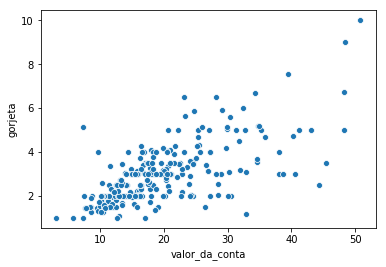

In [44]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

#### *Visualmente, o valor da gorjeta aumenta conforme o valor da conta aumenta*

In [51]:
#verificar quantidade de registros e se há registros nulos
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem - nova coluna para a base de dados

In [53]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


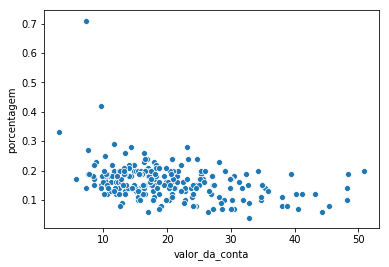

In [56]:
#Scatterplot
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#### Visualmente, o valor da conta não é proporcional ao valor da gorjeta

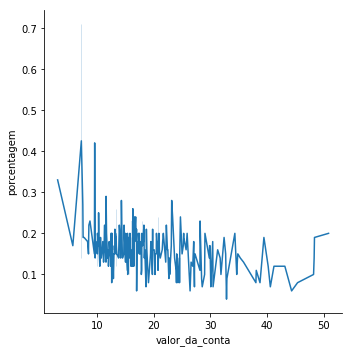

In [57]:
#Relplot - parâmetro kind
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

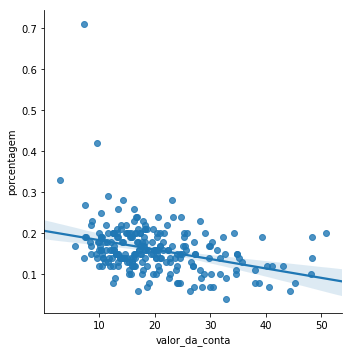

In [58]:
#Lmplot
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [62]:
#Verificar os registros que pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [63]:
#Verificar os registros que não pediram sobremesa
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


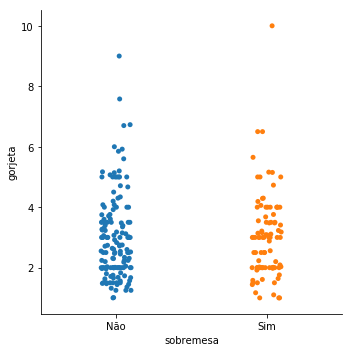

In [64]:
#Catplot
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

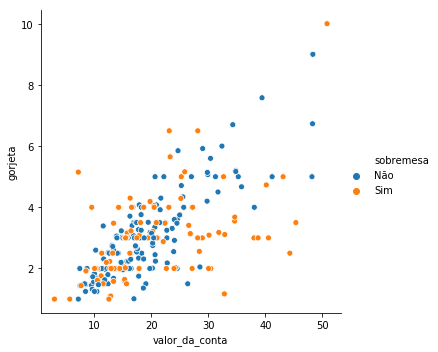

In [65]:
#Relplot - parâmetro hue (acrescenta tonalidades diferentes para as variáveis categóricas)
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

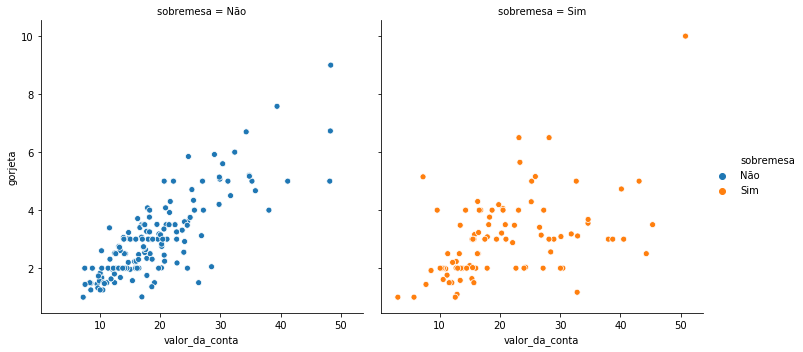

In [66]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

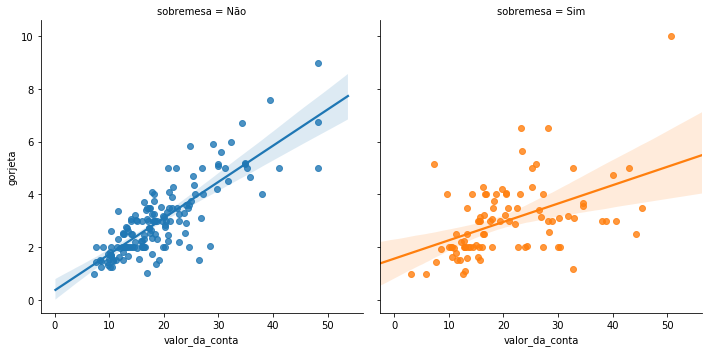

In [67]:
#Lmplot
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

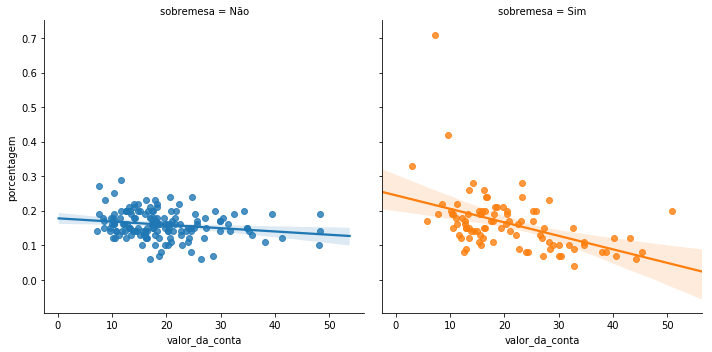

In [68]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

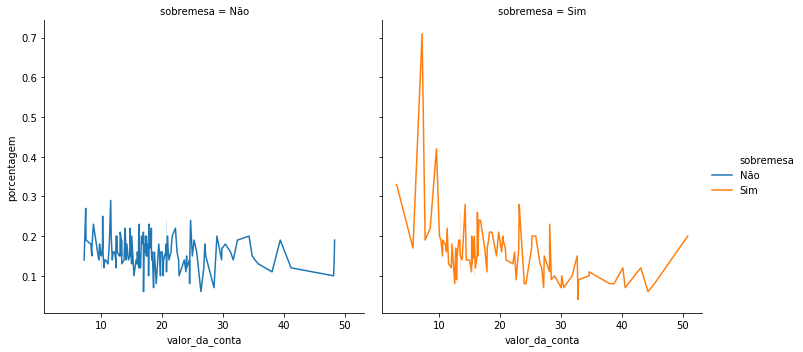

In [70]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

#### Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram sobremesa.

# Teste de hipótese

*   #### H<sup>null</sup>
 *A distribuição da taxa da gorjeta é a mesma nos dois grupos*
 

*   #### H<sup>alt</sup>
 *A distribuição da taxa da gorjeta não é a mesma nos dois grupos*

In [0]:
from scipy.stats import ranksums

In [0]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [0]:
r = ranksums(sobremesa, sem_sobremesa)

In [79]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


#### p-value = 0.52 - matematicamente a diferença entre os dois grupos é insignificante, portanto continua-se a hipótese nula

Para aceitar a hipótese alternativa é necessário atribuir um p-value menor ou igual a 0.05

# Análise 3 - Dia da semana

In [80]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

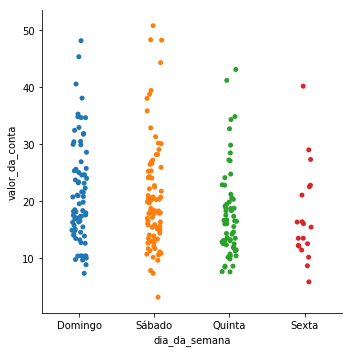

In [81]:
#Verificar em qual dia da semana as pessoas têm gastado mais - Cat categórico

sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

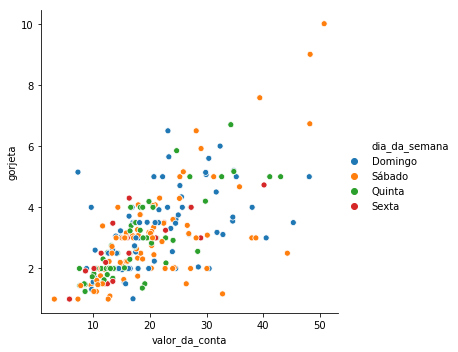

In [82]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

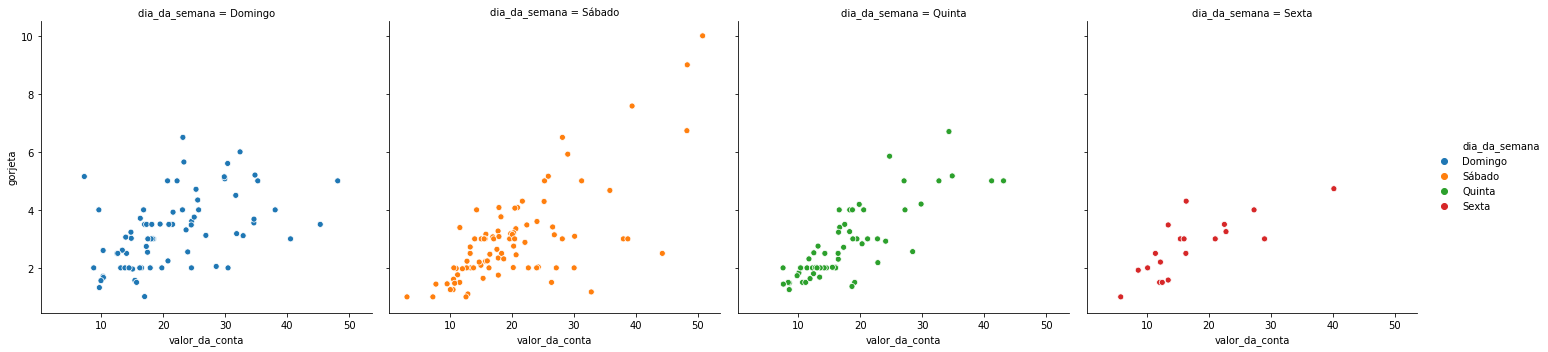

In [83]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

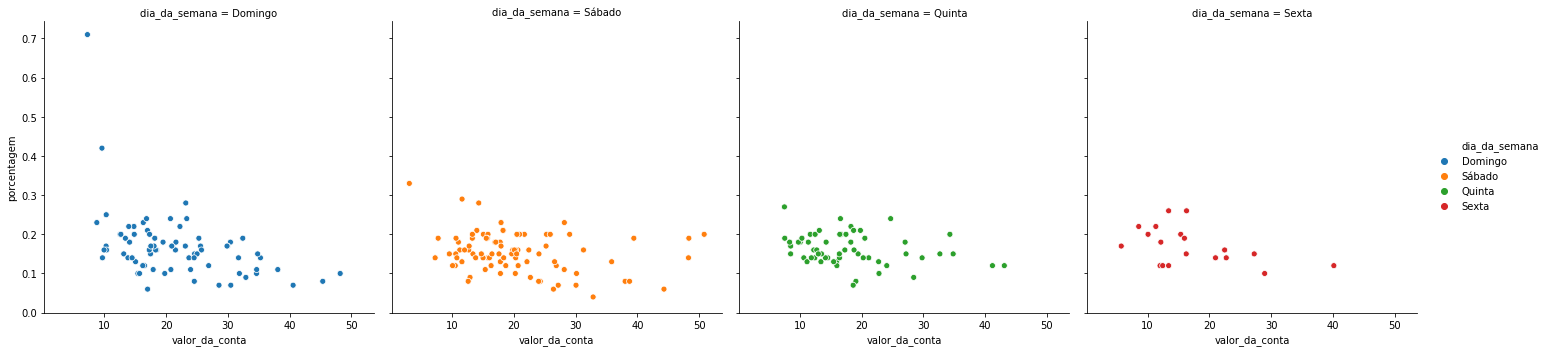

In [84]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

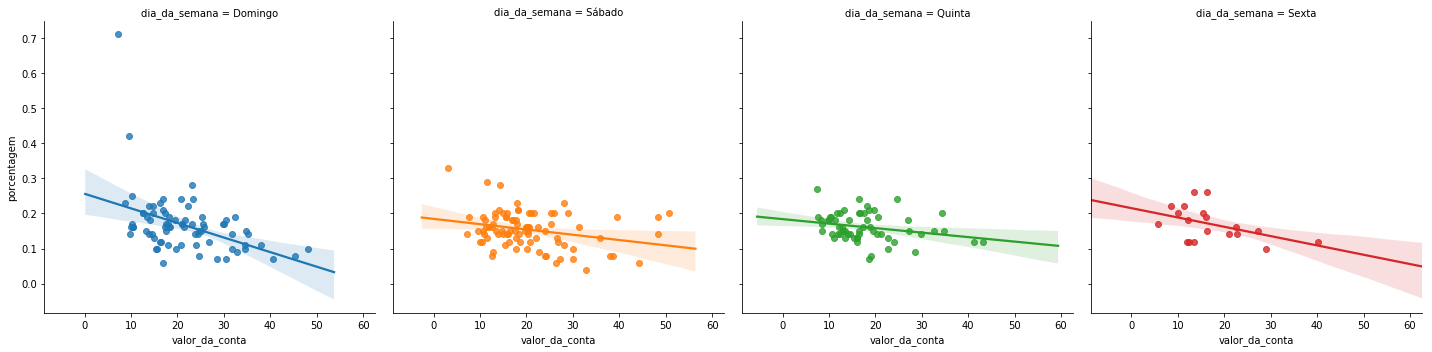

In [86]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [88]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [92]:
#Verificar a média de cada dia da semana
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]  

#dois colchetes depois da média para configurar quais colunas devem aparecer

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [96]:
#Verificar a frequência de cada dia
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Análise 4 - Hora do dia

In [97]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

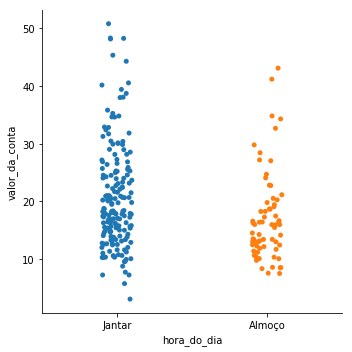

In [98]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

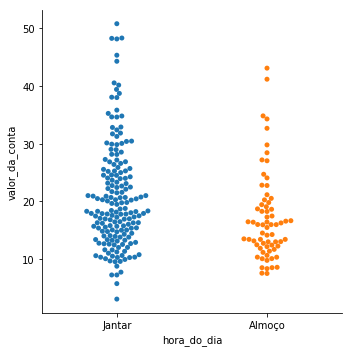

In [99]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

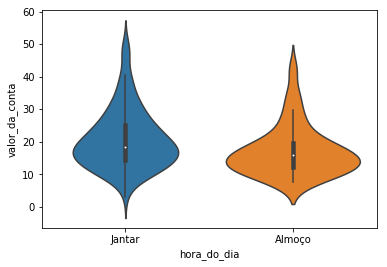

In [100]:
#Violinplot
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

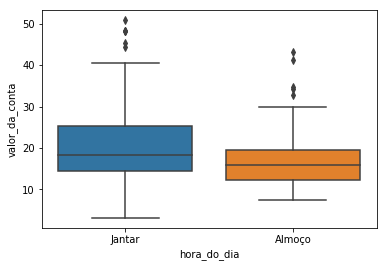

In [102]:
#Boxplot
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [0]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

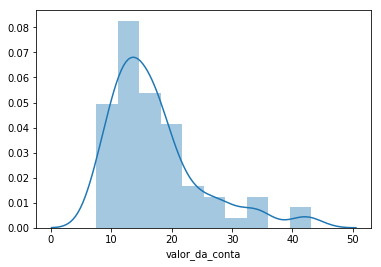

In [104]:
#Distplot
sns.distplot(almoco)

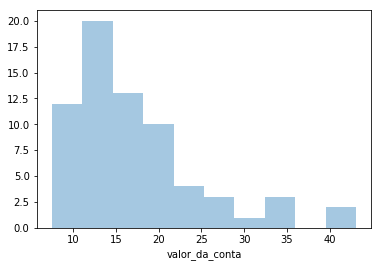

In [105]:
sns.distplot(almoco, kde=False)

In [0]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

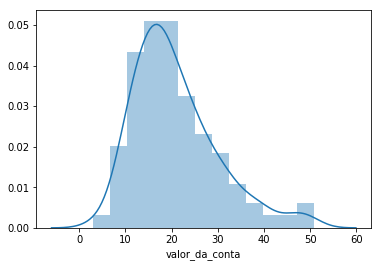

In [108]:
sns.distplot(jantar)

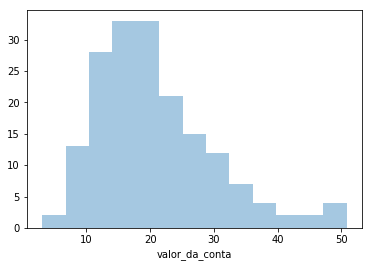

In [109]:
sns.distplot(jantar, kde=False)

# Teste de Hipótese 2

*   #### H<sup>null</sup>
 *A distribuição da taxa da gorjeta é igual no jantar e no almoço*
 

*   #### H<sup>alt</sup>
 *A distribuição da taxa da gorjeta não é igual no jantar e no almoço*

In [0]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [111]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


#### Continua-se com a hipótese nula, pois o p-value está acima de 0.05